## 2.2 张量

### 2.2.1 张量的数据类型

> 在torch中默认的丈量数据类型是32位浮点型（torch.FloatTensor)，可以通过torch.set_default_tensor_type()函数设置默认的数据类型，但是该函数值支持设置浮点型数据类型 <p> 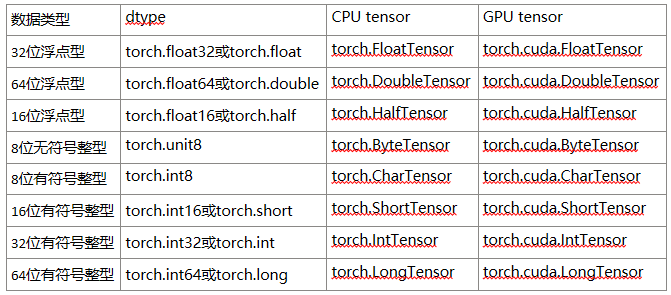

In [2]:
import torch

In [8]:
# 获取张量的数据类型
torch.tensor([1.2, 3.4]).dtype

torch.float32

In [9]:
# 将张量的默认数据类型设置为其他类型
torch.set_default_tensor_type(torch.DoubleTensor)
torch.tensor([1.2, 3.4]).dtype

torch.float64

In [10]:
# 恢复torch默认的数据类型
torch.set_default_tensor_type(torch.FloatTensor)
torch.tensor([1.2, 3.4]).dtype

torch.float32

In [11]:
# 获取默认的数据类型
torch.get_default_dtype()

torch.float32

In [7]:
# 将张量类型转化为整型
a = torch.tensor([1.2, 3.4])
print("a.dtype：", a.dtype)
print("a.long() 方法：", a.long().dtype)
print("a.int() 方法：", a.int().dtype)
print("a.float() 方法：", a.float().dtype)

a.dtype： torch.float32
a.long() 方法： torch.int64
a.int() 方法： torch.int32
a.float() 方法： torch.float32


> 针对张量a，可以使用a.long()方法将其转化为64位有符号整型，a.int()方法将其转化为32位有符号整型，a.float()方法将其转化为32位浮点型

### 2.2.2 生成张量

#### （1）使用torch.tensor()生成张量

> Python的列表或序列可以使用torch.tensor()构造张量<p> .shape可以用来查看张量维度<p> .size()可以用来查看张量的形状大小<p> .numel()可以用来计算张量中元素的数量

In [15]:
# 构造张量
A = torch.tensor([[1.0, 1.0], [2, 2]])
A

4

In [16]:
A.shape # 张量维度

torch.Size([2, 2])

In [17]:
A.size() # 张量形状大小

torch.Size([2, 2])

In [18]:
A.numel() # 张量中包含元素数量

4

> 在使用torch.tensor()函数时，可以使用参数dtype来制定张量的数据类型，使用参数requires_grad来指定张量是否需要计算梯度（只有浮点型可以计算梯度）。只有计算了梯度的张量，才能在深度网络优化时根据梯度大小进行更新

In [22]:
B = torch.tensor((1, 2, 3), dtype=torch.float32, requires_grad=True)
B

tensor([1., 2., 3.], requires_grad=True)

In [23]:
# 因为张量B是可以计算梯度的，可以计算sum(B**2)的梯度
y = B.pow(2).sum()
y.backward()
B.grad

tensor([2., 4., 6.])

#### （2）torch.Tensor()函数

> torch.Tensor()可以根据指定的形状生成张量

In [24]:
# 根据已有的数据创建张量
C = torch.Tensor([1, 2, 3, 4])
C

tensor([1., 2., 3., 4.])

In [25]:
# 创建具有特定大小的张量
D = torch.Tensor(2, 3)
D

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [26]:
# 创建一个与D相同大小和类型的全1张量
torch.ones_like(D)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [27]:
# 创建一个与D相同大小和类型的全0张量
torch.zeros_like(D)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [28]:
# 创建一个与D相同大小和类型的随机张量
torch.rand_like(D)

tensor([[0.6712, 0.7599, 0.6462],
        [0.4782, 0.0305, 0.4304]])

> 针对一个创建好的张量D，可以使用D.new_**()系列函数创建出新的张量 <p> 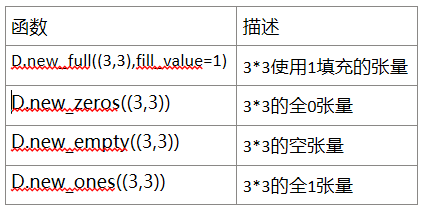

In [30]:
## 创建一个类型相似但尺寸不同的张量
E = [[1, 2], [3, 4]]
E = D.new_tensor(E)
D, E

(tensor([[0., 0., 0.],
         [0., 0., 0.]]),
 tensor([[1., 2.],
         [3., 4.]]))

In [31]:
print("D.dtype:", D.dtype)
print("E.dtype:", E.dtype)

D.dtype: torch.float32
E.dtype: torch.float32


#### （3）张量和NumPy数据相互转换

In [33]:
# 利用Numpy数组生成张量
import numpy as np
F = np.ones((3, 3))
# 使用torch.as_tensor()函数
F_tensor = torch.as_tensor(F)
F, F_tensor

(array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]], dtype=torch.float64))

In [35]:
# 利用Numpy数组生成张量
import numpy as np
F = np.ones((3, 3))
# 使用torch.as_tensor()函数
F_tensor = torch.from_numpy(F)
F, F_tensor

(array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]], dtype=torch.float64))

In [36]:
# 使用张量的.numpy()将张量转化为Numpy数组
F_tensor.numpy()

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

#### （4）随机数生成张量

> 在生成随机数之前，可以使用torch.manual_seed()函数，指定生成随机数的种子，用于保证生成的随机数是可以重复出现的<p> 在torch.normal()中，通过mean参数指定随机数的均值，std参数指定随机数的标准差，如果mean和std都只有一个元素则只会生成一个随机数，如果有多个值，则可生成多个随机数

In [37]:
# 通过指定均值和标准差生成随机数
torch.manual_seed(123)
A = torch.normal(mean=0.0, std=torch.tensor(1.0))
A

tensor(-0.1115)

In [38]:
# 通过指定均值和标准差生成随机数
torch.manual_seed(123)
A = torch.normal(mean=0.0, std=torch.arange(1, 5.0))
A

tensor([-0.1115,  0.2407, -1.1089, -0.9617])

> 也可以使用torch.rand()在区间[0, 1]上生成服从均匀分布的张量

In [40]:
# 在区间[0, 1]上生成均匀分布的张量
torch.manual_seed(123)
B = torch.rand(3, 4)
C = torch.randn(3, 4)
B, C

(tensor([[0.2961, 0.5166, 0.2517, 0.6886],
         [0.0740, 0.8665, 0.1366, 0.1025],
         [0.1841, 0.7264, 0.3153, 0.6871]]),
 tensor([[-0.9724, -0.7550,  0.3239, -0.1085],
         [ 0.2103, -0.3908,  0.2350,  0.6653],
         [ 0.3528,  0.9728, -0.0386, -0.8861]]))

> 使用torch.randperm(n)可以将0-n（包含0不包含n）之间的整数进行随机排序后输出

In [41]:
# 将0-10（不包含10）之间的整数随机排序
torch.manual_seed(123)
torch.randperm(10)

tensor([2, 0, 8, 1, 3, 7, 4, 9, 5, 6])

### 2.2.3 张量操作

#### （1）改变张量的形状

In [42]:
# 使用tensor.reshape()方法设置张量的形状大小
A = torch.arange(12.0).reshape(3, 4)
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [43]:
# 使用torch.reshape()
torch.reshape(input=A, shape=(2, -1)) # 变为2行，列数自动计算（-1）

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10., 11.]])

In [45]:
# 使用resize_()
A.resize_(2, 6) # 将张量A变为2行6列
A

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10., 11.]])

In [46]:
# 使用A.resize_as_(B)，将张量A的形状尺寸设置和B相同
B = torch.arange(10.0, 19.0).reshape(3, 3)
A.resize_as_(B)

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])

In [54]:
# torch.unsqueeze()函数和.unsqueeze()方法在制定维度插入尺寸为1的新张量
A = torch.arange(12.0).reshape(2, 6)
B = torch.unsqueeze(A, dim=0) # 第0维插入
C = B.unsqueeze(dim=3) # 第3维插入
A.shape, B.shape, C.shape

(torch.Size([2, 6]), torch.Size([1, 2, 6]), torch.Size([1, 2, 6, 1]))

In [59]:
# torch.squeeze()函数和.squeeze()方法移除维度大小为1的维度,不标记维度时删除所有维度大小为1的维度
D = torch.squeeze(C)
E = C.squeeze(dim=0)
C.shape, D.shape, E.shape

(torch.Size([1, 2, 6, 1]), torch.Size([2, 6]), torch.Size([2, 6, 1]))

In [69]:
# 使用.expand()方法对张量的维度进行拓展
A = torch.arange(3)
B = A.expand(2, -1)
A, B

(tensor([0, 1, 2]),
 tensor([[0, 1, 2],
         [0, 1, 2]]))

In [65]:
# 使用A.expand_as(C)方法，则会将张量A根据张量C的形状大小进行拓展
C = torch.arange(6).reshape(2, 3)
B = A.expand_as(C)
A, B, C

(tensor([0, 1, 2]),
 tensor([[0, 1, 2],
         [0, 1, 2]]),
 tensor([[0, 1, 2],
         [3, 4, 5]]))

In [66]:
# 使用.repeat()方法拓展张量
D = B.repeat(1, 2, 2)
D, D.shape

(tensor([[[0, 1, 2, 0, 1, 2],
          [0, 1, 2, 0, 1, 2],
          [0, 1, 2, 0, 1, 2],
          [0, 1, 2, 0, 1, 2]]]),
 torch.Size([1, 4, 6]))

#### （2）获取张量中的元素

In [70]:
## 利用切片和索引
A = torch.arange(12).reshape(1, 3, 4)
A

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]])

In [71]:
A[0]

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [72]:
# 获取第0维度下的矩阵前两行元素
A[0, 0:2, :]

tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]])

In [74]:
# 根据条件筛选
B = -A
torch.where(A>5, A, B) # 当A>5为true时返回x对应位置值，为false时返回y值

tensor([[[ 0, -1, -2, -3],
         [-4, -5,  6,  7],
         [ 8,  9, 10, 11]]])

In [75]:
# 获取A中大于5的元素
A[A>5]

tensor([ 6,  7,  8,  9, 10, 11])

In [77]:
# 获取矩阵张量的下三角部分,diagonal参数控制对角线
print(A)
print(torch.tril(A, diagonal=0))
print(torch.tril(A, diagonal=1))

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]])
tensor([[[ 0,  0,  0,  0],
         [ 4,  5,  0,  0],
         [ 8,  9, 10,  0]]])
tensor([[[ 0,  1,  0,  0],
         [ 4,  5,  6,  0],
         [ 8,  9, 10, 11]]])


In [78]:
# 获取矩阵张量的上三角部分，diagonal参数控制对角线
print(A)
print(torch.triu(A, diagonal=0))

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]])
tensor([[[ 0,  1,  2,  3],
         [ 0,  5,  6,  7],
         [ 0,  0, 10, 11]]])


In [79]:
# 提供对角线元素生成矩阵张量
torch.diag(torch.tensor([1, 2, 3]))

tensor([[1, 0, 0],
        [0, 2, 0],
        [0, 0, 3]])

#### （3）拼接和拆分

In [102]:
A = torch.arange(6.0).reshape(2, 3)
B = torch.linspace(0, 10, 6).reshape(2, 3)
print(A)
print(B)

tensor([[0., 1., 2.],
        [3., 4., 5.]])
torch.Size([2, 3])
tensor([[ 0.,  2.,  4.],
        [ 6.,  8., 10.]])
torch.Size([2, 3])


In [103]:
# 在给定维度中连接给定的张量序列
# 在0维度拼接张量
C = torch.cat((A, B), dim=0)
# 在1维度拼接张量
D = torch.cat((A, B), dim=1)
# 拼接3个张量
E= torch.cat((A[:, 1:2], A, B), dim=1)
print(C)
print(C.shape)
print(D)
print(D.shape)
print(E)
print(E.shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 0.,  2.,  4.],
        [ 6.,  8., 10.]])
torch.Size([4, 3])
tensor([[ 0.,  1.,  2.,  0.,  2.,  4.],
        [ 3.,  4.,  5.,  6.,  8., 10.]])
torch.Size([2, 6])
tensor([[ 1.,  0.,  1.,  2.,  0.,  2.,  4.],
        [ 4.,  3.,  4.,  5.,  6.,  8., 10.]])
torch.Size([2, 7])


In [95]:
# 沿新维度连接张量
F = torch.stack((A, B), dim=0)
print(F)
print(F.shape)

tensor([[[ 0.,  1.,  2.],
         [ 3.,  4.,  5.]],

        [[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]])
torch.Size([2, 2, 3])


In [97]:
G = torch.stack((A, B), dim=2)
print(G)
print(G.shape)

tensor([[[ 0.,  0.],
         [ 1.,  2.],
         [ 2.,  4.]],

        [[ 3.,  6.],
         [ 4.,  8.],
         [ 5., 10.]]])
torch.Size([2, 3, 2])


In [104]:
# 在行上将张量E分为两块
D1, D2 = torch.chunk(E, 2, dim=0)
print(D1)
print(D2)

tensor([[1., 0., 1., 2., 0., 2., 4.]])
tensor([[ 4.,  3.,  4.,  5.,  6.,  8., 10.]])


In [106]:
# 如果沿给定维度dim的张量大小不能被块整除，则最后一个块将最小
E1, E2, E3 = torch.chunk(E, 3, dim=1)
print(E1)
print(E2)
print(E3)

tensor([[1., 0., 1.],
        [4., 3., 4.]])
tensor([[2., 0., 2.],
        [5., 6., 8.]])
tensor([[ 4.],
        [10.]])


In [107]:
# 将张量切分为快，指定每个块大小
D1, D2, D3 = torch.split(D, [1, 2, 3], dim=1)
print(D1)
print(D2)
print(D3)

tensor([[0.],
        [3.]])
tensor([[1., 2.],
        [4., 5.]])
tensor([[ 0.,  2.,  4.],
        [ 6.,  8., 10.]])


### 2.2.4 张量计算

#### （1）比较大小与缺失值

In [108]:
# 比较两个数是否接近
A = torch.tensor([10.0])
B = torch.tensor([10.1])
print(torch.allclose(A, B, rtol=1e-05, atol=1e-8, equal_nan=False))
print(torch.allclose(A, B, rtol=0.1, atol=0.01, equal_nan=False))

False
True


In [109]:
# 如果equal_nan=True，那么缺失值可以判断接近
A = torch.tensor(float("nan"))
print(torch.allclose(A, A, equal_nan=False))
print(torch.allclose(A, A, equal_nan=True))

False
True


In [112]:
# 判断元素是否相等
A = torch.tensor([1, 2, 3, 4, 5, 6])
B = torch.arange(1, 7)
C = torch.unsqueeze(B, dim=0)
print(torch.eq(A, B))
print(torch.eq(A, C))
# 判断两个张量是否具有相同的形状和元素
print(torch.equal(A, B))
print(torch.equal(A, C))

tensor([True, True, True, True, True, True])
tensor([[True, True, True, True, True, True]])
True
False


In [114]:
# 逐元素比较大于等于
print(torch.ge(A, B))
print(torch.ge(A, C))
# 逐元素比较大于
print(torch.gt(A, B))
print(torch.gt(A, C))

tensor([True, True, True, True, True, True])
tensor([[True, True, True, True, True, True]])
tensor([False, False, False, False, False, False])
tensor([[False, False, False, False, False, False]])


In [115]:
# 逐元素比较小于等于
print(torch.le(A, B))
print(torch.le(A, C))
# 逐元素比较小于
print(torch.lt(A, B))
print(torch.lt(A, C))

tensor([True, True, True, True, True, True])
tensor([[True, True, True, True, True, True]])
tensor([False, False, False, False, False, False])
tensor([[False, False, False, False, False, False]])


In [117]:
# 逐元素比较不等于
print(torch.ne(A, B))
print(torch.ne(A, C))

tensor([False, False, False, False, False, False])
tensor([[False, False, False, False, False, False]])


In [118]:
# 判断是否为缺失值
torch.isnan(torch.tensor([0, 1, float("nan"), 2]))

tensor([False, False,  True, False])

#### （2）基本运算

In [119]:
A = torch.arange(6.0).reshape(2, 3)
B = torch.linspace(10, 20, steps=6).reshape(2, 3)
print(A)
print(B)

tensor([[0., 1., 2.],
        [3., 4., 5.]])
tensor([[10., 12., 14.],
        [16., 18., 20.]])


In [120]:
print("A*B: ", A*B) # 逐元素相乘
print("A/B: ", A/B) # 逐元素相除
print("A+B: ", A+B) # 逐元素相除
print("A-B: ", A-B) # 逐元素相除

A*B:  tensor([[  0.,  12.,  28.],
        [ 48.,  72., 100.]])
A/B:  tensor([[0.0000, 0.0833, 0.1429],
        [0.1875, 0.2222, 0.2500]])
A+B:  tensor([[10., 13., 16.],
        [19., 22., 25.]])
A-B:  tensor([[-10., -11., -12.],
        [-13., -14., -15.]])


In [122]:
print(torch.pow(A, 3)) # 张量的幂
print(A**3) # 张量的幂

tensor([[  0.,   1.,   8.],
        [ 27.,  64., 125.]])
tensor([[  0.,   1.,   8.],
        [ 27.,  64., 125.]])


In [123]:
print(torch.exp(A)) # 张量的指数
print(torch.log(A)) # 张量的对数
print(torch.sqrt(A)) # 张量的平方根
print(torch.rsqrt(A)) # 张量的平方根倒数

tensor([[  1.0000,   2.7183,   7.3891],
        [ 20.0855,  54.5981, 148.4132]])
tensor([[  -inf, 0.0000, 0.6931],
        [1.0986, 1.3863, 1.6094]])
tensor([[0.0000, 1.0000, 1.4142],
        [1.7321, 2.0000, 2.2361]])
tensor([[   inf, 1.0000, 0.7071],
        [0.5774, 0.5000, 0.4472]])


In [124]:
# 根据最大值裁剪
print(torch.clamp_max(A, 4))
# 根据最小值裁剪
print(torch.clamp_min(A, 3))
# 根据范围裁剪
print(torch.clamp(A, 2.5, 4))

tensor([[0., 1., 2.],
        [3., 4., 4.]])
tensor([[3., 3., 3.],
        [3., 4., 5.]])
tensor([[2.5000, 2.5000, 2.5000],
        [3.0000, 4.0000, 4.0000]])


In [128]:
# 矩阵转置
C = torch.t(A)
print(C)
# 矩阵相乘
print(A.matmul(C))

tensor([[0., 3.],
        [1., 4.],
        [2., 5.]])
tensor([[ 5., 14.],
        [14., 50.]])


In [129]:
C = torch.rand(3, 3)
# 矩阵的逆
D = torch.inverse(C)
print(torch.matmul(C, D))

tensor([[ 1.0000e+00,  2.9802e-08,  0.0000e+00],
        [ 2.9802e-08,  1.0000e+00, -5.9605e-08],
        [ 0.0000e+00,  5.9605e-08,  1.0000e+00]])

In [130]:
# 计算张量矩阵的迹，对角线元素的和
torch.trace(torch.arange(9.0).reshape(3, 3))

tensor(12.)

#### （3）统计相关的计算

In [132]:
# 一维张量的最大值和最小值
A = torch.tensor([12., 34, 25, 11, 67, 32, 29, 30, 99, 55, 23, 44])
# 最大值
print("最大值：", torch.max(A))
print("最小值：", A.min())

最大值： tensor(99.)
最小值： tensor(11.)


In [135]:
# 二维张量的最大值和最小值
B = A.reshape(3, 4)
print("2维张量B:\n", B)
# 最大值
print("最大值:\n", B.max(dim=1))
print("最小值:\n", torch.min(B, dim=1))

2维张量B:
 tensor([[12., 34., 25., 11.],
        [67., 32., 29., 30.],
        [99., 55., 23., 44.]])
最大值:
 torch.return_types.max(
values=tensor([34., 67., 99.]),
indices=tensor([1, 0, 0]))
最小值:
 torch.return_types.min(
values=tensor([11., 29., 23.]),
indices=tensor([3, 2, 2]))


In [138]:
print("2维张量B:\n", B)
print("每行均值：", torch.mean(B, dim=1, keepdim=True)) # keepdim=True表示输出向量是否保留维度
print("每列均值：", torch.mean(B, dim=0, keepdim=True))
print("每行和：", torch.sum(B, dim=1, keepdim=True))
print("每列和：", torch.sum(B, dim=0, keepdim=True))
print("按行累加和：", torch.cumsum(B, dim=1))
print("按列累加和：", torch.cumsum(B, dim=0))
print("每行中位数：", torch.median(B, dim=1))
print("每列中位数：", torch.median(B, dim=0))
print("每行乘积：", torch.prod(B, dim=1, keepdim=True))
print("每列乘积：", torch.prod(B, dim=0, keepdim=True))
print("按行累乘积：", torch.cumprod(B, dim=1))
print("按列累乘积：", torch.cumprod(B, dim=0))
print("每行标准差：", torch.std(B, dim=1, keepdim=True))
print("每列标准差：", torch.std(B, dim=0, keepdim=True))

2维张量B:
 tensor([[12., 34., 25., 11.],
        [67., 32., 29., 30.],
        [99., 55., 23., 44.]])
每行均值： tensor([[20.5000],
        [39.5000],
        [55.2500]])
每列均值： tensor([[59.3333, 40.3333, 25.6667, 28.3333]])
每行和： tensor([[ 82.],
        [158.],
        [221.]])
每列和： tensor([[178., 121.,  77.,  85.]])
按行累加和： tensor([[ 12.,  46.,  71.,  82.],
        [ 67.,  99., 128., 158.],
        [ 99., 154., 177., 221.]])
按列累加和： tensor([[ 12.,  34.,  25.,  11.],
        [ 79.,  66.,  54.,  41.],
        [178., 121.,  77.,  85.]])
每行中位数： torch.return_types.median(
values=tensor([12., 30., 44.]),
indices=tensor([0, 3, 3]))
每列中位数： torch.return_types.median(
values=tensor([67., 34., 25., 30.]),
indices=tensor([1, 0, 0, 1]))
每行乘积： tensor([[ 112200.],
        [1865280.],
        [5510340.]])
每列乘积： tensor([[79596., 59840., 16675., 14520.]])
按行累乘积： tensor([[1.2000e+01, 4.0800e+02, 1.0200e+04, 1.1220e+05],
        [6.7000e+01, 2.1440e+03, 6.2176e+04, 1.8653e+06],
        [9.9000e+01, 5.4450e+03, 1.25

In [139]:
# 一维张量的最大值和最小值位置
A = torch.tensor([12., 34, 25, 11, 67, 32, 29, 30, 99, 55, 23, 44])
# 最大值
print("最大值位置：", torch.argmax(A))
print("最小值位置：", A.argmin())

最大值位置： tensor(8)
最小值位置： tensor(3)


In [140]:
# 二维张量的最大值和最小值位置
B = A.reshape(3, 4)
print("2维张量B:\n", B)
# 最大值
print("按行最大值位置:\n", B.argmax(dim=1))
print("按行最小值位置:\n", torch.argmin(B, dim=1))

2维张量B:
 tensor([[12., 34., 25., 11.],
        [67., 32., 29., 30.],
        [99., 55., 23., 44.]])
按行最大值位置:
 tensor([1, 0, 0])
按行最小值位置:
 tensor([3, 2, 2])


In [141]:
# 张量排序，分别输出从小到大的排序结果和相应的元素在原始位置的索引
torch.sort(A)

torch.return_types.sort(
values=tensor([11., 12., 23., 25., 29., 30., 32., 34., 44., 55., 67., 99.]),
indices=tensor([ 3,  0, 10,  2,  6,  7,  5,  1, 11,  9,  4,  8]))

In [143]:
# 按照降序排列
torch.sort(A, descending=True)

torch.return_types.sort(
values=tensor([99., 67., 55., 44., 34., 32., 30., 29., 25., 23., 12., 11.]),
indices=tensor([ 8,  4,  9, 11,  1,  5,  7,  6,  2, 10,  0,  3]))

In [151]:
# 对2维张量进行排序
Bsort, Bsort_id=B.sort() # 默认dim为最后一维
print("B sort:\n", Bsort)
print("B sort index:\n", Bsort_id)
print("B argsort:\n", torch.argsort(B))
# 返回按升序对给定维度的张量排序的索引，是torch.sort()为默认参数时返回的第二个值

B sort:
 tensor([[12., 32., 23., 11.],
        [67., 34., 25., 30.],
        [99., 55., 29., 44.]])
B sort index:
 tensor([[0, 1, 2, 0],
        [1, 0, 0, 1],
        [2, 2, 1, 2]])
B argsort:
 tensor([[3, 0, 2, 1],
        [2, 3, 1, 0],
        [2, 3, 1, 0]])


In [152]:
# 获取一维张量前几个大的数值
torch.topk(A, 4)

torch.return_types.topk(
values=tensor([99., 67., 55., 44.]),
indices=tensor([ 8,  4,  9, 11]))

In [153]:
# 获取2维张量每列前几个大的数值
Btop2, Btop2_id = torch.topk(B, 2, dim=0)
print("B 每列 top2:\n", Btop2)
print("B 每列 top2 位置:\n", Btop2_id)

B 每列 top2:
 tensor([[99., 55., 29., 44.],
        [67., 34., 25., 30.]])
B 每列 top2 位置:
 tensor([[2, 2, 1, 2],
        [1, 0, 0, 1]])


In [154]:
# 获取张量第k小的数值和位置
torch.kthvalue(A, 3)

torch.return_types.kthvalue(
values=tensor(23.),
indices=tensor(10))

In [155]:
# 获取2维张量第k小的数值和位置
torch.kthvalue(B, 3, dim=1)

torch.return_types.kthvalue(
values=tensor([25., 32., 55.]),
indices=tensor([2, 1, 1]))

In [157]:
# 获取2维张量第k小的数值和位置
Bkth, Bkth_id = torch.kthvalue(B, 3, dim=1, keepdim=True)
print(Bkth)
print(Bkth_id)

tensor([[25.],
        [32.],
        [55.]])
tensor([[2],
        [1],
        [1]])
